#### I found the following tutorial helpful:
[https://www.freecodecamp.org/news/how-to-build-and-train-linear-and-logistic-regression-ml-models-in-python/](https://www.freecodecamp.org/news/how-to-build-and-train-linear-and-logistic-regression-ml-models-in-python/)

In [414]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as m
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [415]:
class Model():
  model: LinearRegression

  def __init__(self):
    self.LinearRegression = LinearRegression()

  def fit(self, x, y):
    return self.LinearRegression.fit(x, y)

  def predict(self, x):
    predicted_labels = [self.LinearRegression.predict(x)]
    return predicted_labels

  def RMSE(self, predicted, actual):
    mse = m.mean_squared_error(predicted, actual)
    return np.sqrt(mse)
  
  def MAE(self, predicted, actual):
    return m.mean_absolute_error(predicted, actual)


In [416]:
df = pd.read_csv("faithful.csv")
#Old Faithful Geyser data (eruption duration, waiting time in days)
#from: https://www.kaggle.com/datasets/janithwanni/old-faithful?resource=download
df.head(5)

,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85


In [417]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  272 non-null    int64  
 1   eruptions   272 non-null    float64
 2   waiting     272 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 6.5 KB
None


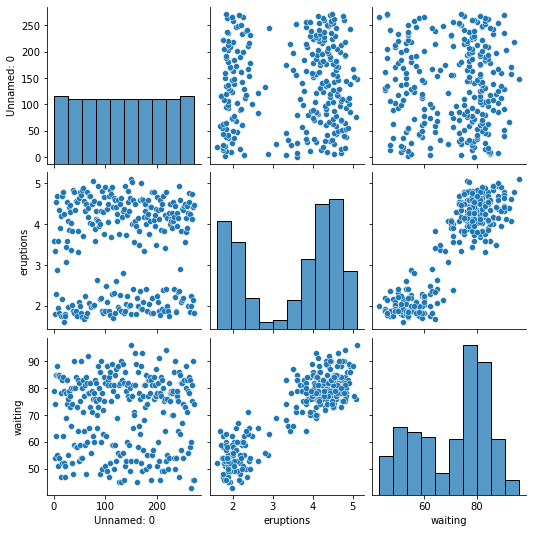

In [418]:
sn.pairplot(df)

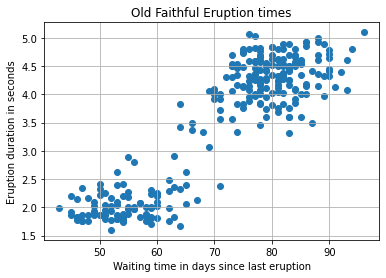

In [419]:
plt.figure()
plt.scatter(df["waiting"], df["eruptions"])
plt.xlabel("Waiting time in days since last eruption")
plt.ylabel("Eruption duration in seconds")
plt.title("Old Faithful Eruption times")
plt.grid()
plt.show()

In [420]:
df.rename(columns={"Unnamed: 0":"Eruption ID"}, inplace=True)
print(df.columns)

Index(['Eruption ID', 'eruptions', 'waiting'], dtype='object')


In [421]:
Y = df.loc[:, "eruptions"] 
X = df.loc[:, "waiting"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [422]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
eruptions = np.array(eruptions)
model = Model()
model.LinearRegression.fit(X_train.reshape(-1, 1), Y_train.reshape(-1, 1))

LinearRegression()

In [423]:
X_test = pd.Series(X_test)
X_test = np.array(X_test)

In [424]:
%%time
Y_pred = model.LinearRegression.predict(X_test.reshape(-1, 1))

CPU times: total: 0 ns
Wall time: 0 ns


In [425]:
Y_pred = pd.DataFrame(Y_pred)
Y_pred.head(5)

,0
0,3.043368
1,1.851058
2,3.639523
3,3.788562
4,4.235678


In [426]:
print(type(Y_test))
Y_test = pd.DataFrame(Y_test)
Y_test.head(5)

<class 'pandas.core.series.Series'>


,eruptions
68,2.067
212,1.867
84,4.067
240,4.150
140,4.233


In [427]:
Y_test = np.array(Y_test)
print(model.RMSE(Y_pred, Y_test.reshape(-1, 1)))

0.41197033970570585


In [428]:
print(model.MAE(Y_pred, Y_test.reshape(-1, 1)))

0.3234519941623921
